In [1]:
import pandas as pd
from qamsi.utils.data import read_csv

recent = read_csv(".", "cgp_ucb_gmv.csv")
# for i in range(2, 3):
#     ckpt = read_csv(".", f"cgp_ucb_{i}.csv")
#     recent = pd.concat([recent, ckpt], axis=0)

In [2]:
recent

,cgp_ucb
date,
1982-01-29,0.04
1982-02-26,0.02
1982-03-31,0.00
1982-04-30,0.10
1982-05-28,0.04
...,...
2023-06-30,0.42
2023-07-31,0.42
2023-08-31,0.54


In [3]:
targets = read_csv("../2_DNK/", "targets.csv", "end_date")
targets

,start_date,vol,naive_vol,shrinkage
end_date,,,,
1981-01-29,1980-12-31,0.006478,0.006508,0.167364
1981-01-30,1981-01-02,0.006500,0.006614,0.382393
1981-02-02,1981-01-05,0.005181,0.005253,0.197455
1981-02-03,1981-01-06,0.004921,0.004940,0.145795
1981-02-04,1981-01-07,0.004314,0.004395,0.210126
...,...,...,...,...
2023-12-12,2023-11-13,0.004721,0.004726,0.122149
2023-12-13,2023-11-14,0.004817,0.005012,0.410885
2023-12-14,2023-11-15,0.005649,0.005740,0.313682


In [4]:
p = recent.merge(targets["shrinkage"], left_index=True, right_index=True).loc[
    "2000-01-01":
]

In [5]:
p

,cgp_ucb,shrinkage
2000-01-31,0.10,1.021295e-17
2000-02-29,0.03,9.752485e-18
2000-03-31,0.36,0.000000e+00
2000-04-28,0.10,0.000000e+00
2000-05-31,0.10,0.000000e+00
...,...,...
2023-06-30,0.42,5.017739e-01
2023-07-31,0.42,1.000000e+00
2023-08-31,0.54,1.541628e-01
2023-09-29,0.54,7.283827e-02


In [6]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(p["shrinkage"], p["cgp_ucb"])

0.3793347830555455

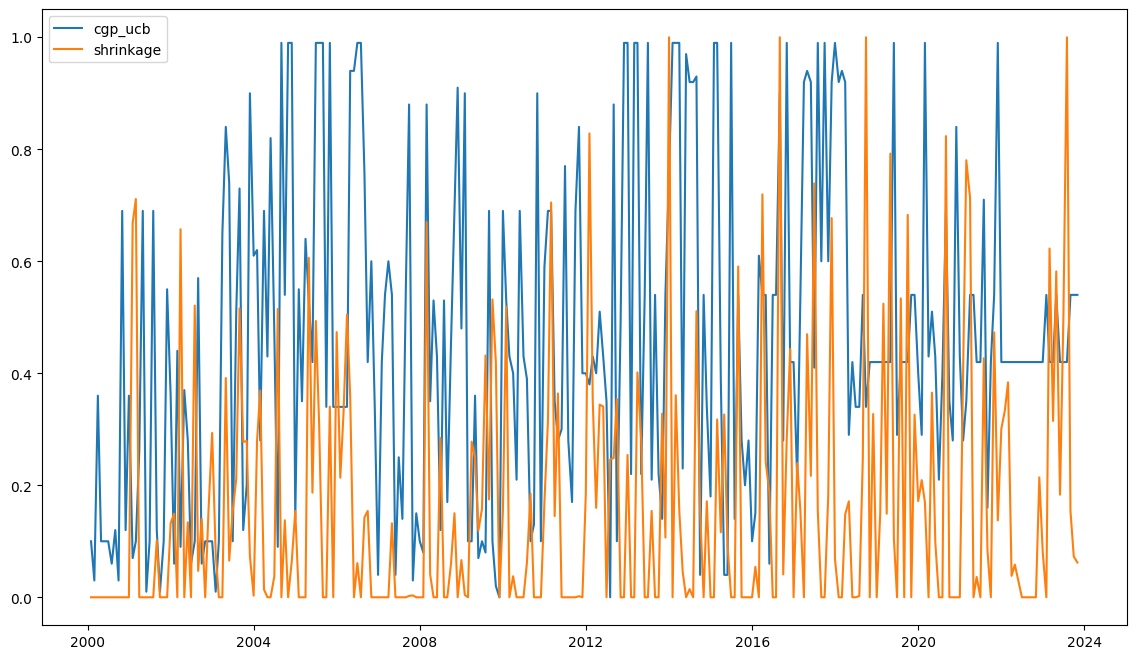

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(p.index, p["cgp_ucb"], label="cgp_ucb")
plt.plot(p.index, p["shrinkage"], label="shrinkage")
plt.legend()
plt.show()

In [8]:
data_df = read_csv("../../data/output/", "dnk_spx_data.csv")

In [9]:
data_df.shape

(10813, 1478)

In [10]:
data_df = data_df.drop(columns=["end_date"])

In [11]:
data_df = data_df.merge(recent, how="left", left_index=True, right_index=True)
data_df.shape

(10813, 1478)

In [12]:
opt = data_df["cgp_ucb"]
opt[opt.notna()].loc[:"2000-12-29"]

date
1982-01-29    0.04
1982-02-26    0.02
1982-03-31    0.00
1982-04-30    0.10
1982-05-28    0.04
              ... 
2000-08-31    0.12
2000-09-29    0.03
2000-10-31    0.69
2000-11-30    0.12
2000-12-29    0.36
Name: cgp_ucb, Length: 228, dtype: float64

In [13]:
data_df.columns

Index(['10006', '10057', '10078', '10104', '10107', '10108', '10137', '10138',
       '10145', '10147',
       ...
       'stocks_vol', 'ewma', 'lw_intensity', 'momentum_feature', 'trace',
       'universe_vol', 'lagged_target', 'target_rolling_mean',
       'target_rolling_vol', 'cgp_ucb'],
      dtype='object', length=1478)

In [14]:
# data_df = data_df.drop(columns="cgp_ucb")

In [15]:
data_df.to_csv("../../data/output/spx_data.csv")